In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('zoo.csv')

In [3]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data['type'].value_counts()
# This shows that this is a imbalanced multi class dataset, hence will use 
# 1. stratify while splitting
# 2. the averaging method = macro [airthmetic mean] as all animal types (classes) are equally important

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
data.drop(['animal name'],axis=1, inplace=True)
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
## Splitting the dataset

X = data.iloc[:, :-1]

y = data.iloc[:, -1]

In [11]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.25)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

k_metrics = {}

In [19]:
def Elbow(K):
    for i in K:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)
        test_predict = model.predict(X_test)    
        f1 = f1_score(y_test, test_predict, average='macro')
        error = 1-f1
        k_metrics.update({i:(f1, error)})        
    return k_metrics


In [21]:
import numpy as np
K_range = np.array(range(1,31))

K_metrics = Elbow(K_range)

K_metrics

{1: (0.9238095238095237, 0.07619047619047625),
 2: (0.7142857142857143, 0.2857142857142857),
 3: (0.9500000000000001, 0.04999999999999993),
 4: (0.8965986394557823, 0.10340136054421767),
 5: (0.5874458874458873, 0.4125541125541127),
 6: (0.5874458874458873, 0.4125541125541127),
 7: (0.48608534322820035, 0.5139146567717996),
 8: (0.48608534322820035, 0.5139146567717996),
 9: (0.48608534322820035, 0.5139146567717996),
 10: (0.48608534322820035, 0.5139146567717996),
 11: (0.48608534322820035, 0.5139146567717996),
 12: (0.48608534322820035, 0.5139146567717996),
 13: (0.45751391465677177, 0.5424860853432283),
 14: (0.45751391465677177, 0.5424860853432283),
 15: (0.45751391465677177, 0.5424860853432283),
 16: (0.4805194805194805, 0.5194805194805194),
 17: (0.4805194805194805, 0.5194805194805194),
 18: (0.4805194805194805, 0.5194805194805194),
 19: (0.4805194805194805, 0.5194805194805194),
 20: (0.4805194805194805, 0.5194805194805194),
 21: (0.4278185582533408, 0.5721814417466592),
 22: (0.32

In [24]:
df_metrics = pd.DataFrame(K_metrics, index = ['score', 'error']).T
df_metrics

,score,error
1,0.923810,0.076190
2,0.714286,0.285714
3,0.950000,0.050000
4,0.896599,0.103401
5,0.587446,0.412554
6,0.587446,0.412554
7,0.486085,0.513915
8,0.486085,0.513915
9,0.486085,0.513915
10,0.486085,0.513915


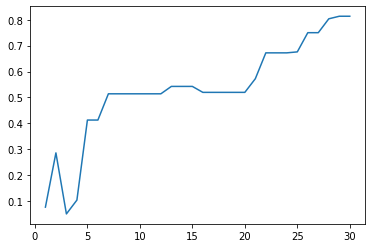

In [25]:
import matplotlib.pyplot as plt

plt.plot(df_metrics.index, df_metrics['error'])
plt.show()

# This shows optimum K = 4.

### Trying to do the same with GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score

model = KNeighborsClassifier()
grid = dict(n_neighbors= np.array(range(1,31)))

grid_model = GridSearchCV(model, grid, scoring= 'f1_macro', cv=4)
grid_model.fit(X, y)

grid_model.best_params_

{'n_neighbors': 1}

In [32]:
grid_model.cv_results_

{'mean_fit_time': array([0.00551021, 0.00367278, 0.0035736 , 0.00342375, 0.00043428,
        0.00363946, 0.00428724, 0.00391662, 0.        , 0.0032649 ,
        0.00391883, 0.0039053 , 0.0038895 , 0.        , 0.00390267,
        0.00581175, 0.00090927, 0.00693303, 0.00448275, 0.00391906,
        0.0033893 , 0.00390035, 0.00300199, 0.00781322, 0.00390524,
        0.        , 0.0056259 , 0.00115407, 0.00446248, 0.00391936]),
 'std_fit_time': array([0.00204009, 0.00144345, 0.00266331, 0.00085683, 0.00075219,
        0.00630373, 0.00742572, 0.00678379, 0.        , 0.00565498,
        0.00678761, 0.00676417, 0.00673681, 0.        , 0.00675963,
        0.00647185, 0.00093339, 0.00705023, 0.00649906, 0.00678802,
        0.00587044, 0.0067556 , 0.0051996 , 0.00781322, 0.00676407,
        0.        , 0.0071549 , 0.0019989 , 0.00772924, 0.00678854]),
 'mean_score_time': array([0.00624442, 0.00479764, 0.00553632, 0.00481158, 0.00391769,
        0.00782466, 0.00365627, 0.0079506 , 0.0046162 , 0.00

In [36]:
grid_model.cv_results_['mean_test_score']

array([0.92108844, 0.78962585, 0.76873583, 0.71159297, 0.72698413,
       0.69296157, 0.64849773, 0.5307952 , 0.49338023, 0.48623737,
       0.48623737, 0.48623737, 0.48482574, 0.48482574, 0.48482574,
       0.48482574, 0.48482574, 0.48482574, 0.49394757, 0.45079977,
       0.3944686 , 0.35626984, 0.35626984, 0.35626984, 0.35626984,
       0.35625438, 0.31996032, 0.2885235 , 0.23464286, 0.22134158])

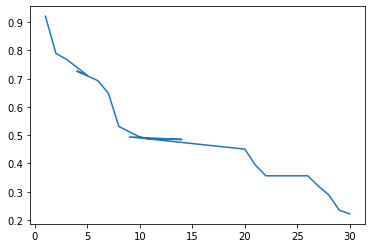

In [37]:
plt.plot(grid_model.cv_results_['rank_test_score'], grid_model.cv_results_['mean_test_score'])
plt.show()